In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
wine = pd.read_csv('Wine_data.csv')

In [5]:
wine.columns = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality']

In [6]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Check for missing values in data

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


There are no missing values in this dataset. 

In [9]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [20]:
wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

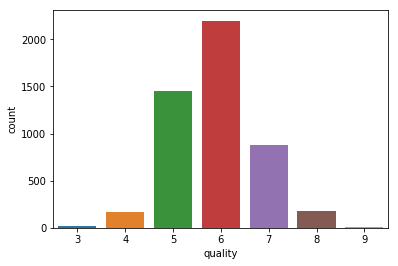

In [21]:
sns.countplot(x='quality', data=wine)

In [10]:
wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Perform basic EDA on the data

In [2]:
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


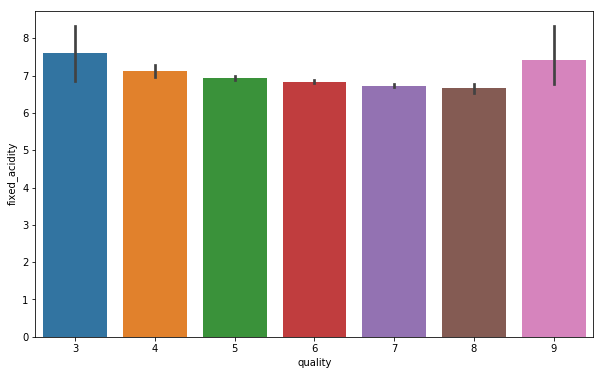

In [14]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed_acidity', data = wine)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


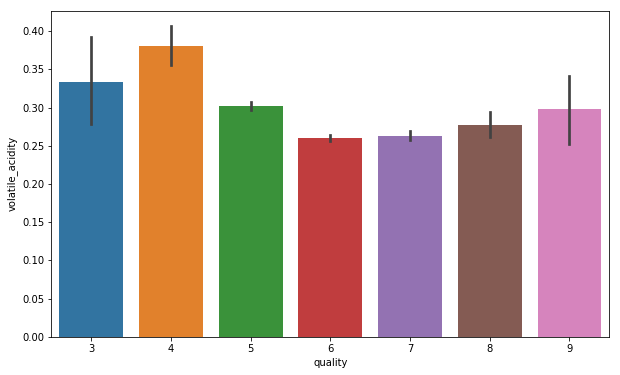

In [16]:
#Here we see that the volatile acidity decreases as the quality increases after 4.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile_acidity', data = wine)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


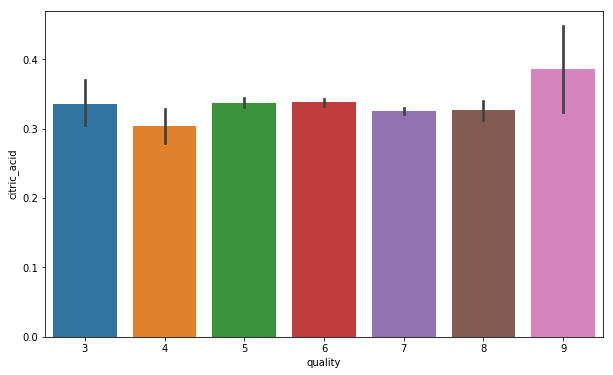

In [19]:
#Composition of citric acid go higher as we go higher in the quality of the wine
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric_acid', data = wine)

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Alcohol percent in different wine quality types')]

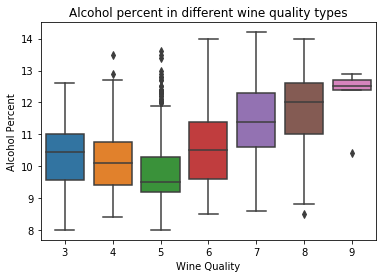

In [22]:
bx = sns.boxplot(x="quality", y='alcohol', data = wine)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

## Distribution of the Wine data

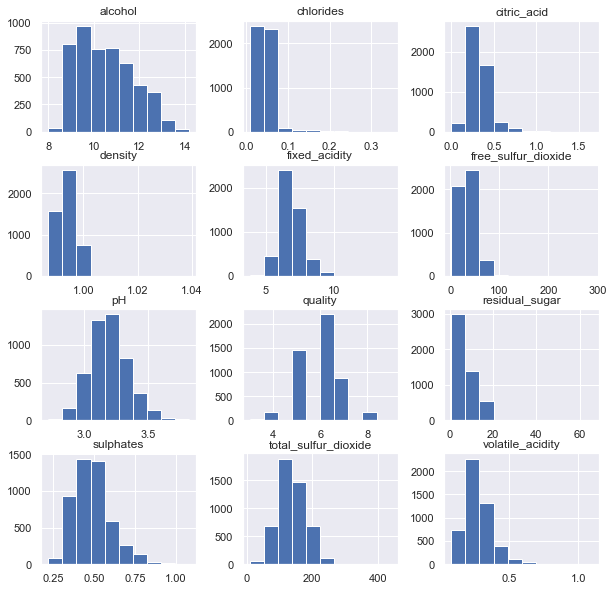

In [26]:
# data.hist(figsize=(10,10))
sns.set()
wine.hist(figsize=(10,10))
plt.show()

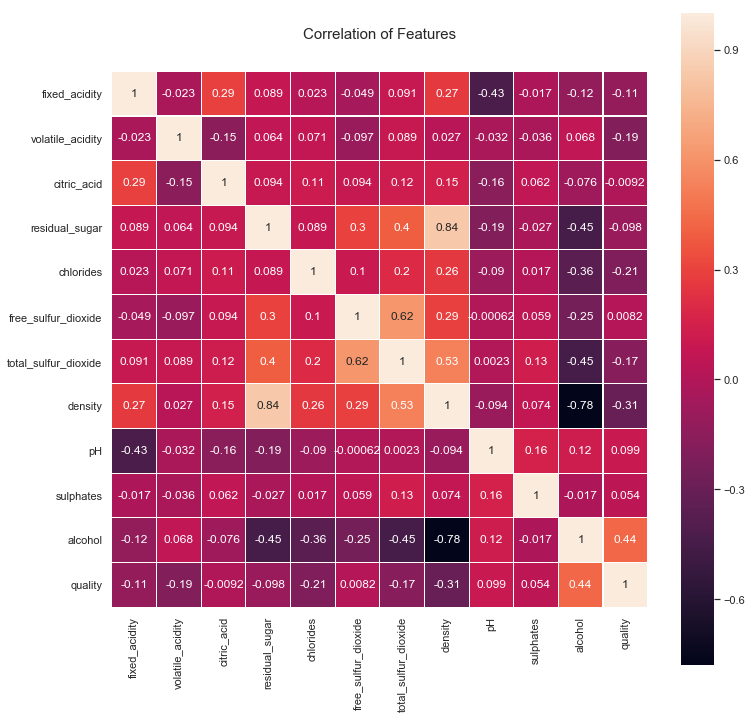

In [27]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(wine.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

### Observations:
Wine Quality has the highest correlation with Alcohol, followed by the various acidity, sulphates, density & chlorides.

Let's use all the features in the classifiers.

## Check for Outliers

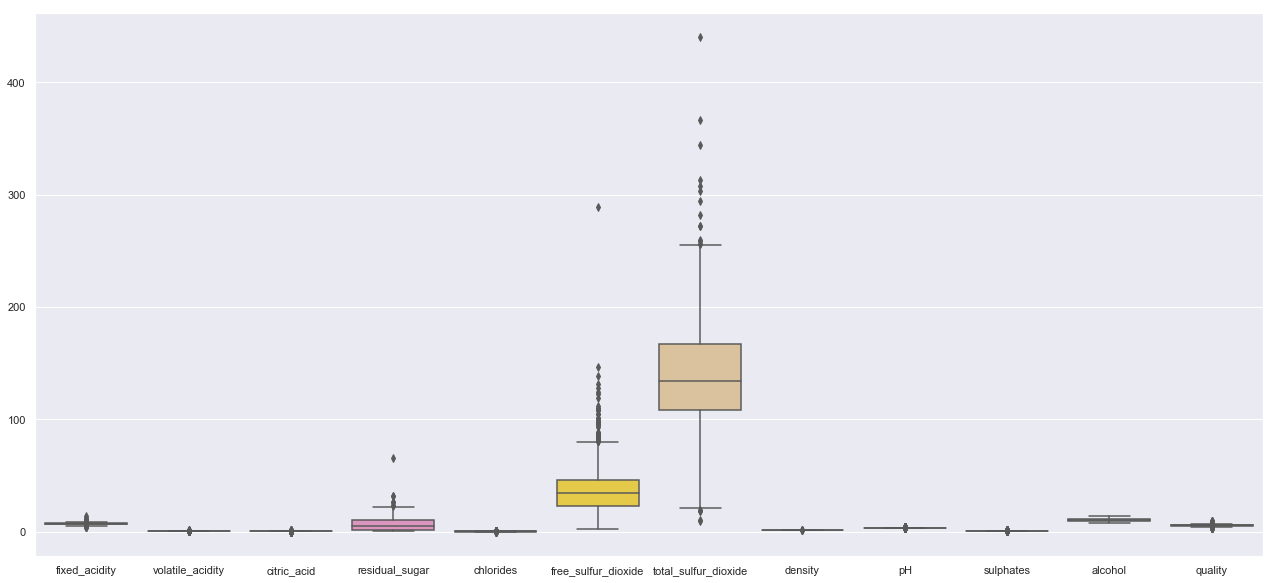

In [33]:
fig = plt.figure(figsize = (22,10))
ax = sns.boxplot(data=wine, palette="Set2")

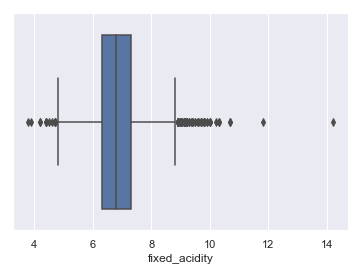

In [34]:
ax = sns.boxplot(x=wine["fixed_acidity"])

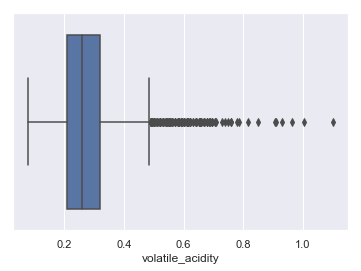

In [35]:
ax = sns.boxplot(x=wine["volatile_acidity"])

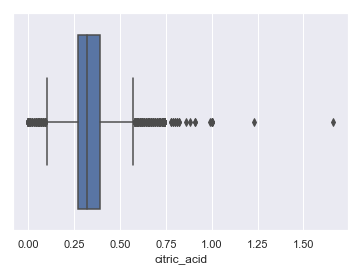

In [36]:
ax = sns.boxplot(x=wine["citric_acid"])

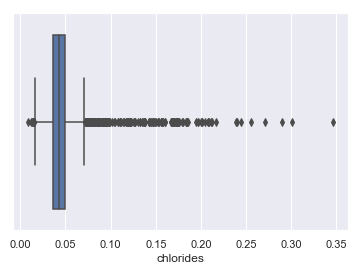

In [38]:
ax = sns.boxplot(x=wine["chlorides"])

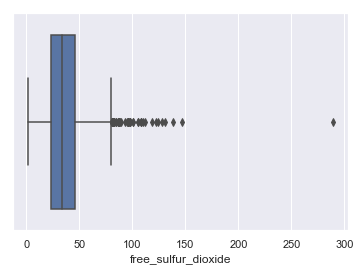

In [40]:
ax = sns.boxplot(x=wine["free_sulfur_dioxide"])

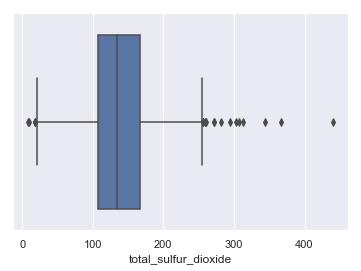

In [41]:
ax = sns.boxplot(x=wine["total_sulfur_dioxide"])

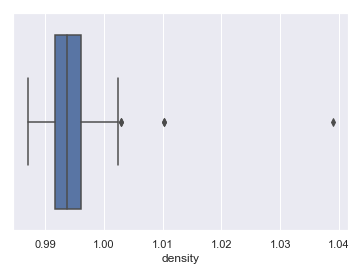

In [42]:
ax = sns.boxplot(x=wine["density"])

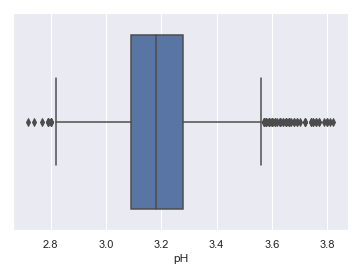

In [43]:
ax = sns.boxplot(x=wine["pH"])

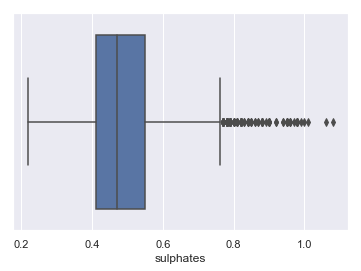

In [44]:
ax = sns.boxplot(x=wine["sulphates"])

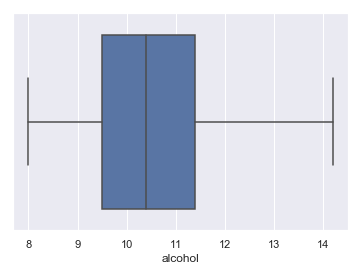

In [45]:
ax = sns.boxplot(x=wine["alcohol"])

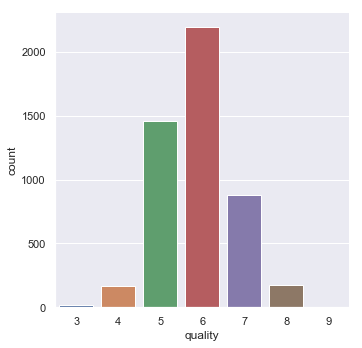

In [49]:
sns.catplot(x="quality", kind="count", data=wine)

## Observation:
1. Quality has most values concentrated in the categories 5, 6 and 7. Only a small proportion is in the categories [3,4] and [8,9] and none in the categories [1,2,10].

2. Fixed acidity, volatile acidity, citric acid, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, pH and sulphates have outliers. If those outliers are eliminated distribution of the variables may be taken to be symmetric.

3. Residual sugar has a positively skewed distribution; even after eliminating the outliers distribution will remain skewed.

4. Some of the variables, e.g density, have a few outliers but these are very different from the rest.

5. Mostly outliers are on the larger side.

6. Alcohol has an irregular shaped distribution but it does not have pronounced outliers.

7. The classes are ordered and not balanced e.g. there are much more normal wines than excellent or poor ones.

8. Outlier detection algorithms could be used to detect the few excellent or poor wines.

9. Several of the attributes may be correlated, thus it makes sense to apply some sort of feature selection.

## Ouliers Treatment:

In [63]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(wine))
print(z)

[[1.72096961e-01 8.17699008e-02 2.13280202e-01 ... 3.49184257e-01
  1.39315246e+00 1.37870140e-01]
 [6.57501128e-01 2.15895632e-01 4.80011213e-02 ... 1.34184656e-03
  8.24275678e-01 1.37870140e-01]
 [1.47575110e+00 1.74519434e-02 5.43838363e-01 ... 4.36815783e-01
  3.36667007e-01 1.37870140e-01]
 ...
 [4.20473102e-01 3.79435433e-01 1.19159198e+00 ... 2.61552731e-01
  9.05543789e-01 1.37870140e-01]
 [1.60561323e+00 1.16673788e-01 2.82557040e-01 ... 9.62604939e-01
  1.85757201e+00 1.26711420e+00]
 [1.01304317e+00 6.77100966e-01 3.78559282e-01 ... 1.48839409e+00
  1.04489089e+00 1.37870140e-01]]


In [64]:
wine.shape

(4898, 12)

In [65]:
wine = wine[(z < 3).all(axis=1)]

In [66]:
wine.shape

(4487, 12)

#### Therefore, we have dealt with the outliers in the dataset using the z-score values.
#### And we can see that after outlier treatment around 411 rows have been removed from the dataset.

## Data Preperation:

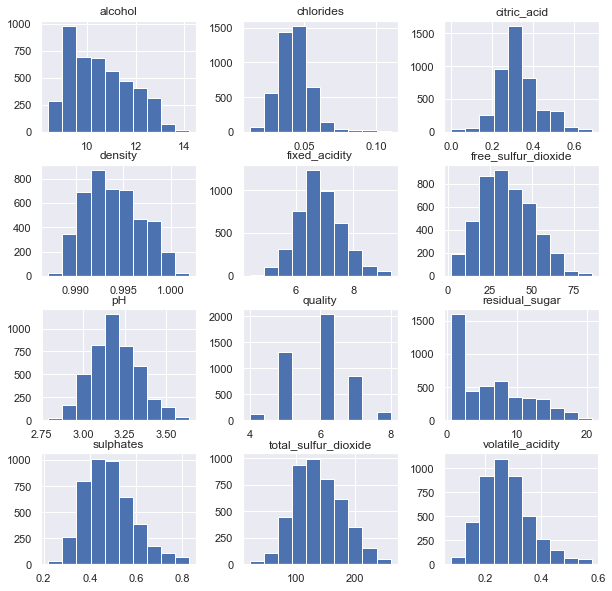

In [67]:
# data.hist(figsize=(10,10))
sns.set()
wine.hist(figsize=(10,10))
plt.show()

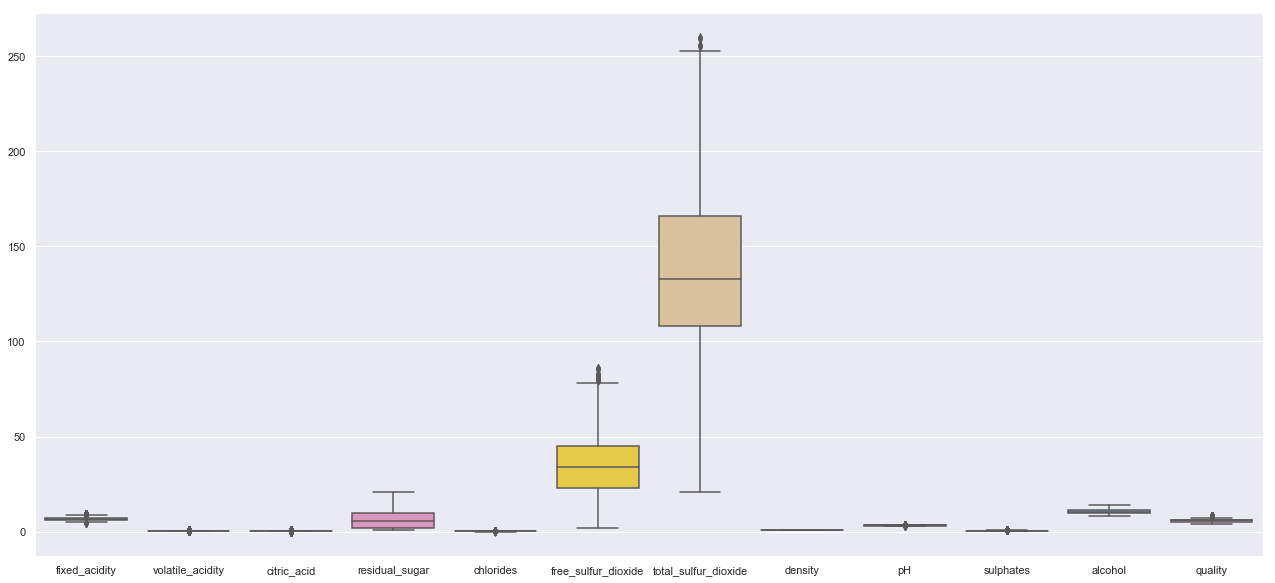

In [68]:
fig = plt.figure(figsize = (22,10))
ax = sns.boxplot(data=wine, palette="Set2")

In [69]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6, 9)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [73]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [74]:
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [75]:
wine['quality'].value_counts()

0    3471
1    1016
Name: quality, dtype: int64

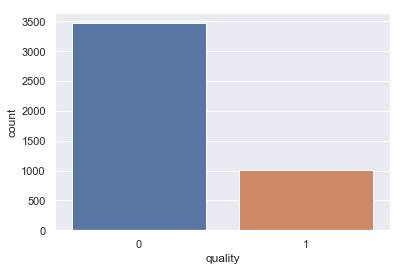

In [76]:
sns.countplot(wine['quality'])

## Split data into train and test

In [79]:
wine.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
dtype: object

In [80]:
# Convert the 'quality' column as categorical
wine['quality'] = wine.quality.astype('category')
# Verify again if indeed this changed it to the categorical datatype
wine.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

In [81]:
wine.groupby(["quality"]).count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,3471,3471,3471,3471,3471,3471,3471,3471,3471,3471,3471
1,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016,1016


In [82]:
# Create a separate dataframe consisting only of the features i.e independent attributes
wine_feature_df = wine.drop(labels= "quality" , axis = 1)

In [85]:
wine_feature_df_z = wine_feature_df.apply(zscore) 

In [84]:
wine_labels = wine["quality"]

In [86]:
X = np.array(wine_feature_df_z)

In [87]:
# store the bc_labels data into a separate np array

Y = np.array(wine_labels)

In [88]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [90]:
X_train.shape

(3589, 11)

In [91]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3589, 11), (3589,), (898, 11), (898,))

## Building the Decision Tree Classifier Model

In [95]:
from sklearn.tree import DecisionTreeClassifier

DTClassifier = DecisionTreeClassifier (max_depth=3, min_samples_split = 3, random_state = 0)
# Your code here
# DTClassifier.fit (# Your code here, # Your code here)
#Hint: 
DTClassifier.fit (X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [96]:
predicted_labels = DTClassifier.predict(X_test)
predicted_labels

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

We now need to see how well our Decision Tree Classifier is actually working. We do this by calculating the accuracy score i.e. how many test cases were correctly predicted as a ratio of total number of test cases

In [97]:
score = accuracy_score(y_test, predicted_labels)
print(score)

0.7839643652561247


In [147]:
DTClassifier_new = DecisionTreeClassifier (max_depth=24, random_state = 42)
DTClassifier_new.fit(X_train, y_train)
predicted_labels = DTClassifier_new.predict(X_test)
accuracy_score_new = accuracy_score(y_test, predicted_labels)
print(accuracy_score_new)

0.8140311804008908


In [145]:
DTClassifier_new = DecisionTreeClassifier (max_depth=16, criterion = "gini",min_samples_leaf= 5,random_state = 42)
DTClassifier_new.fit(X_train, y_train)
predicted_labels = DTClassifier_new.predict(X_test)
accuracy_score_new = accuracy_score(y_test, predicted_labels)
print(accuracy_score_new)

0.8017817371937639


## Using KNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
def getAccuracy(testSet, predictions):
	correct = 0
	for x in range(len(testSet)):
		if testSet[x][-1] is predictions[x]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

In [124]:
NNH = KNeighborsClassifier(n_neighbors= 30 , weights = 'uniform', metric='euclidean')

In [125]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

In [170]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors=3)
NNH.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [164]:
predicted_labels = NNH.predict(X_test)
print(predicted_labels)

[1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0
 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [172]:
accuracy_score_new = accuracy_score(y_test, predicted_labels)
print(accuracy_score_new)

0.8552338530066815


## Using Naives Bayes

In [135]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [136]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [137]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       685
           1       0.46      0.63      0.53       213

   micro avg       0.73      0.73      0.73       898
   macro avg       0.66      0.70      0.67       898
weighted avg       0.77      0.73      0.75       898

[[525 160]
 [ 78 135]]


In [138]:
accuracy_score_new = accuracy_score(y_test, predicted)
print(accuracy_score_new)

0.734966592427617


### Using hyperparameter tuning, we could find that the KNN algorithm was giving the best accuracy with 85.55%. And this algorithm approach will be the best use in the real world as it predicts with the best possible accuracy based on the given predictors. 